In [20]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVR
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df=pd.read_csv("/kaggle/input/germany-city-rainfall-data/Rainfall_Data_Germany_Complete.csv")
df

,City,Latitude,Longitude,Month,Year,Rainfall (mm),Elevation (m),Climate_Type,Temperature (°C),Humidity (%)
0,Berlin,52.5200,13.405,1,2015,71.56,34,Oceanic,19.6,72
1,Berlin,52.5200,13.405,2,2015,129.56,34,Oceanic,31.4,88
2,Berlin,52.5200,13.405,3,2015,24.58,34,Oceanic,15.4,61
3,Berlin,52.5200,13.405,4,2015,177.73,34,Oceanic,15.1,62
4,Berlin,52.5200,13.405,5,2015,100.62,34,Oceanic,-3.0,57
...,...,...,...,...,...,...,...,...,...,...
1075,Hanover,52.3759,9.732,8,2023,34.14,55,Oceanic,32.2,61
1076,Hanover,52.3759,9.732,9,2023,6.09,55,Oceanic,12.2,57
1077,Hanover,52.3759,9.732,10,2023,40.89,55,Oceanic,-0.2,30
1078,Hanover,52.3759,9.732,11,2023,68.08,55,Oceanic,15.5,89


In [4]:
label_encoder=LabelEncoder()
for col in df.columns:
    df[col]=label_encoder.fit_transform(df[col])

In [5]:
df

,City,Latitude,Longitude,Month,Year,Rainfall (mm),Elevation (m),Climate_Type,Temperature (°C),Humidity (%)
0,0,8,8,0,0,377,1,1,231,42
1,0,8,8,1,0,664,1,1,339,58
2,0,8,8,2,0,124,1,1,194,31
3,0,8,8,3,0,932,1,1,191,32
4,0,8,8,4,0,525,1,1,18,27
...,...,...,...,...,...,...,...,...,...,...
1075,6,7,4,7,8,170,4,1,346,31
1076,6,7,4,8,8,34,4,1,164,27
1077,6,7,4,9,8,205,4,1,45,0
1078,6,7,4,10,8,358,4,1,195,59


In [6]:
X=df.drop(columns=["Rainfall (mm)"])
Y=df["Rainfall (mm)"]

In [7]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=42)

In [8]:
X_train.shape


(864, 9)

In [9]:
r=RandomForestRegressor()
parms={    'n_estimators': [50, 100, 200,250]
}
random_reg=GridSearchCV(estimator=r,cv=2,param_grid=parms)
random_reg.fit(X_train,Y_train)
# random_reg.score(X_test,Y_test)

GridSearchCV(cv=2, estimator=RandomForestRegressor(),
             param_grid={'n_estimators': [50, 100, 200, 250]})

In [10]:
print(random_reg.best_params_)
print(random_reg.best_score_)
print(random_reg.best_estimator_)
test_score = random_reg.best_estimator_.score(X_test, Y_test)
test_score

{'n_estimators': 250}
-0.06746529792106881
RandomForestRegressor(n_estimators=250)


-0.09808265878115585

In [16]:
log_reg=SVR()
log_reg.fit(X_train,Y_train)
log_reg.score(X_test,Y_test)

-0.007689116150869646

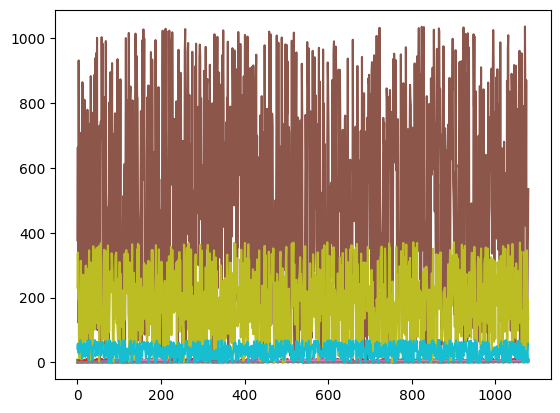

In [19]:
plt.plot(df)
plt.show()

title City


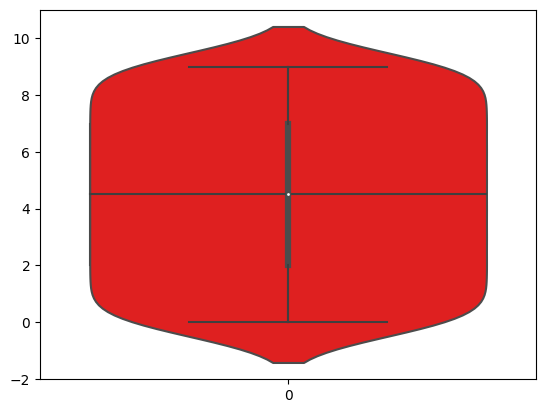

title Latitude


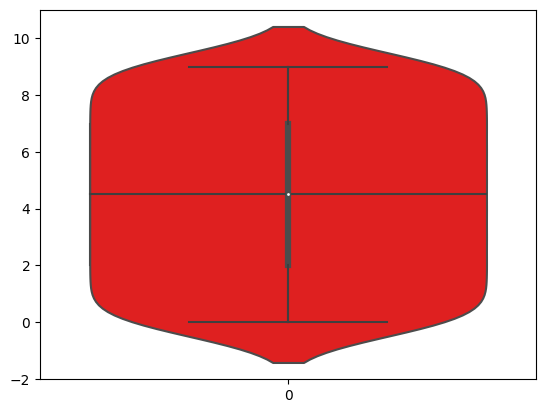

title Longitude


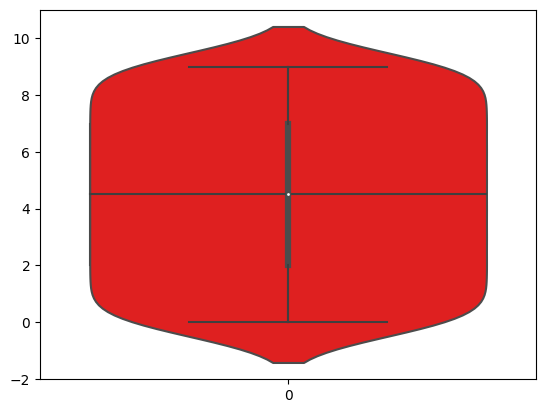

title Month


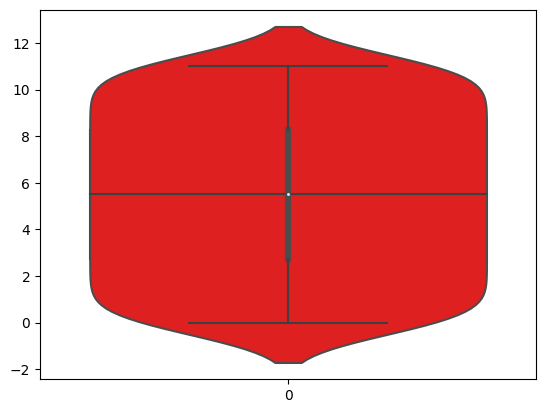

title Year


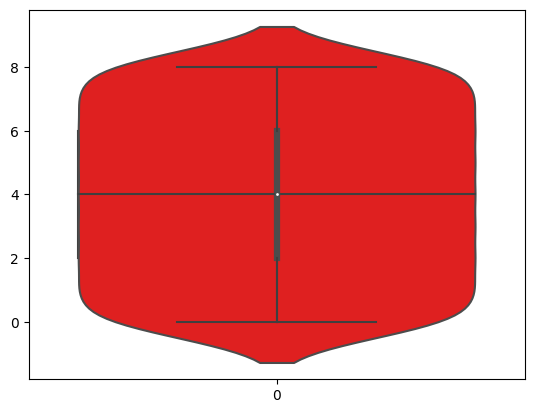

title Rainfall (mm)


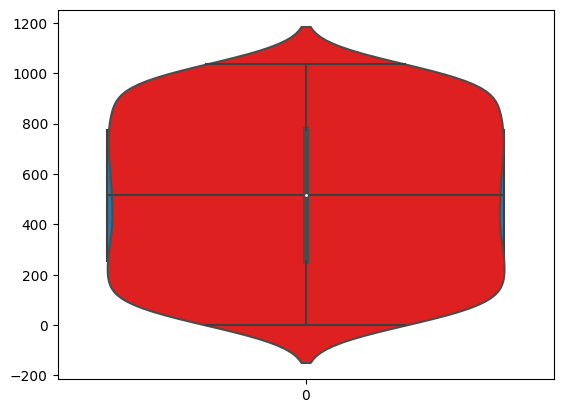

title Elevation (m)


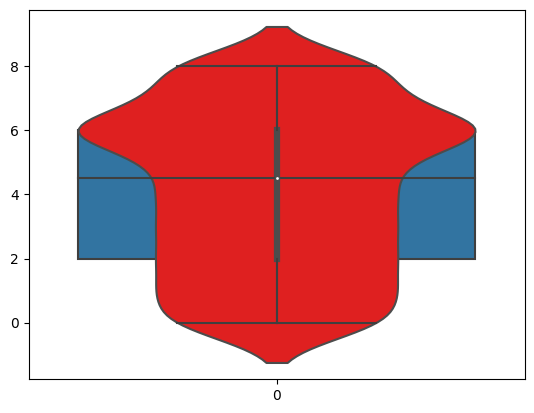

title Climate_Type


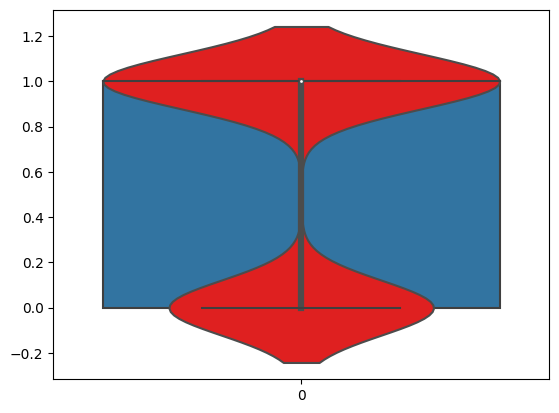

title Temperature (°C)


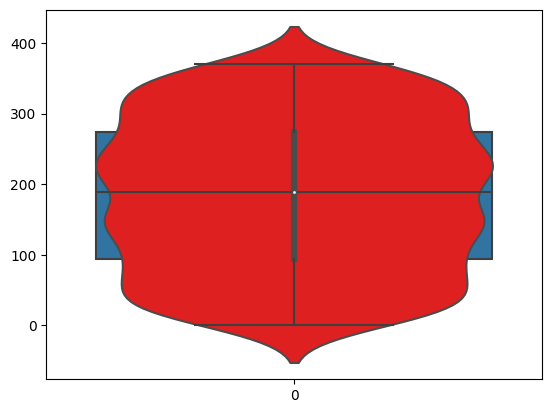

title Humidity (%)


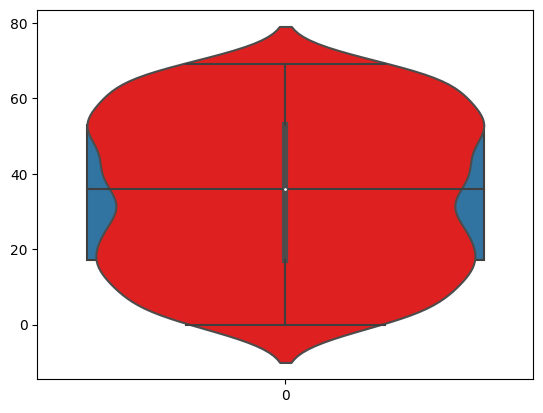

In [26]:
for col in df.columns:
    sns.violinplot(df[col],color="red")
    sns.boxplot(df[col])
    print(f"title {col}")
    plt.show()

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


title City


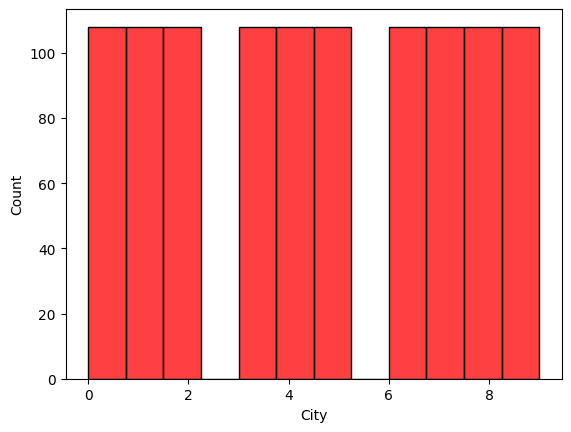

title Latitude


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


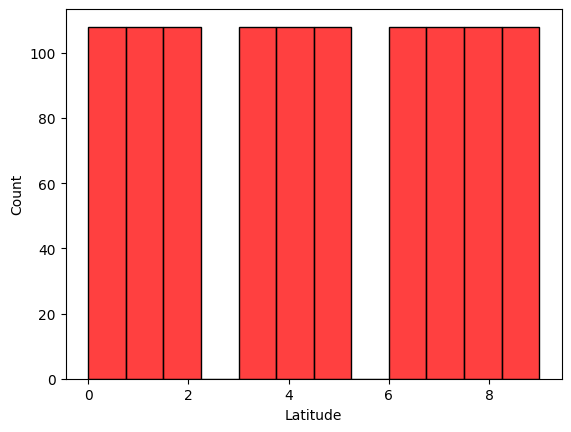

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


title Longitude


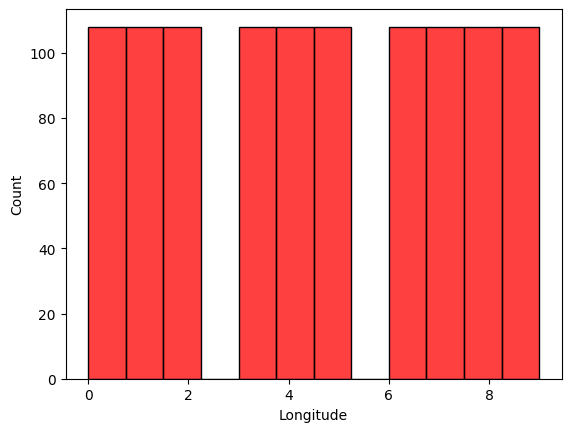

title Month


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


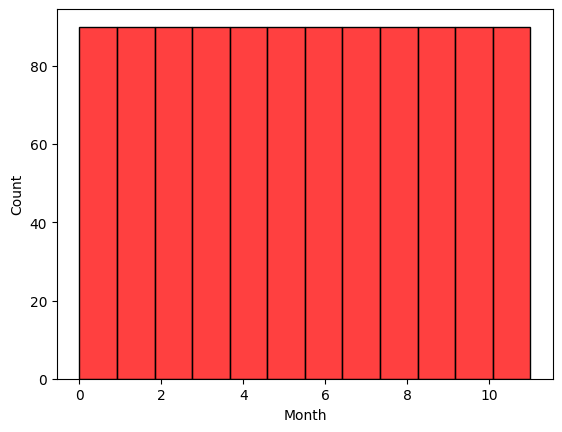

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


title Year


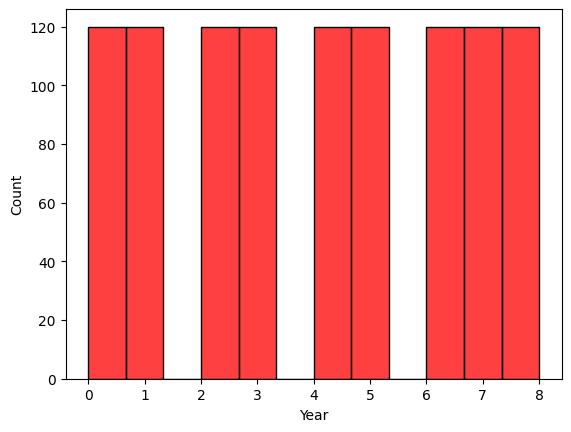

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


title Rainfall (mm)


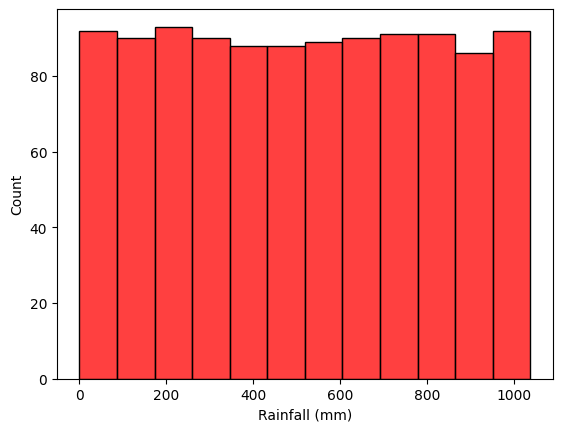

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


title Elevation (m)


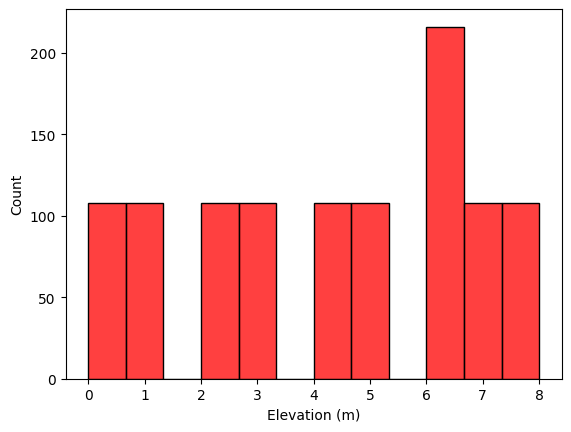

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


title Climate_Type


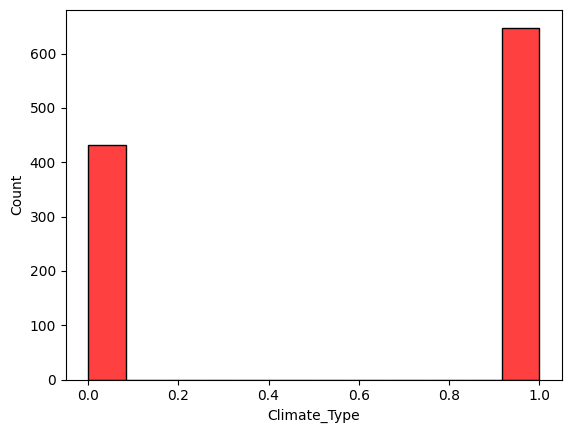

title Temperature (°C)


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


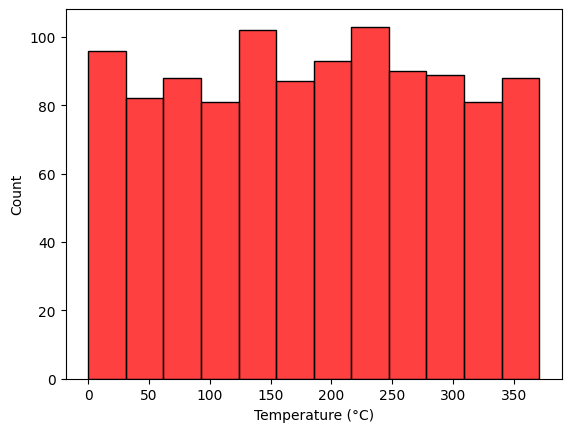

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


title Humidity (%)


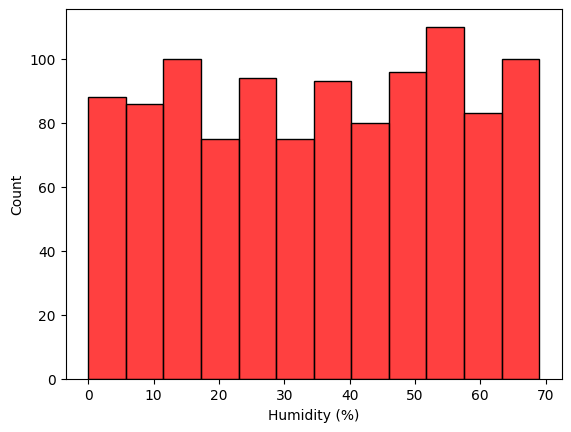

In [31]:
for col in df.columns:
    sns.histplot(df[col],color="red")
    print(f"title {col}")
    plt.show()

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


title City


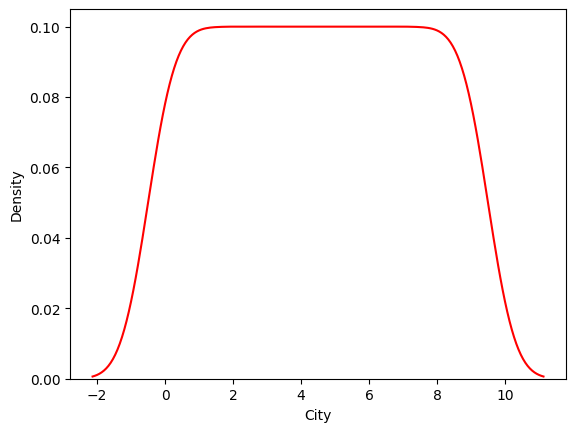

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


title Latitude


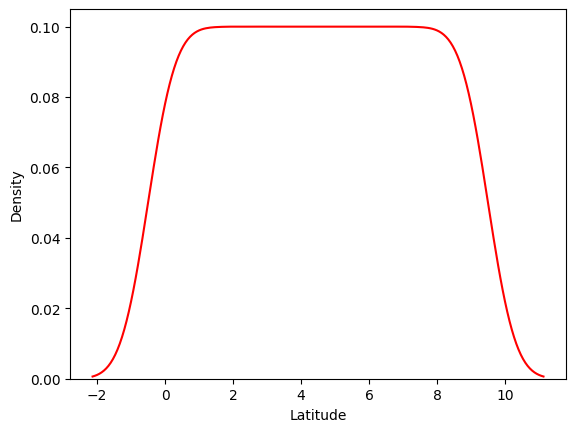

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


title Longitude


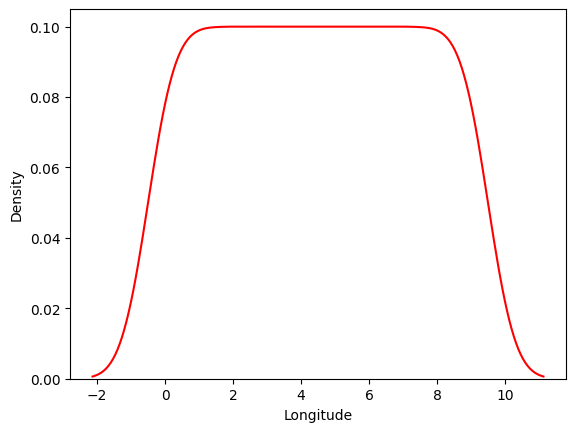

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


title Month


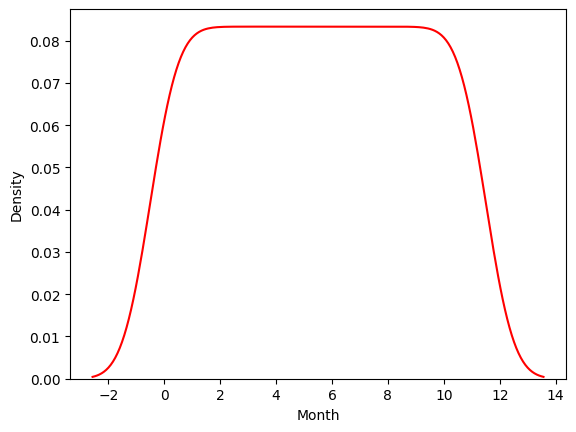

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


title Year


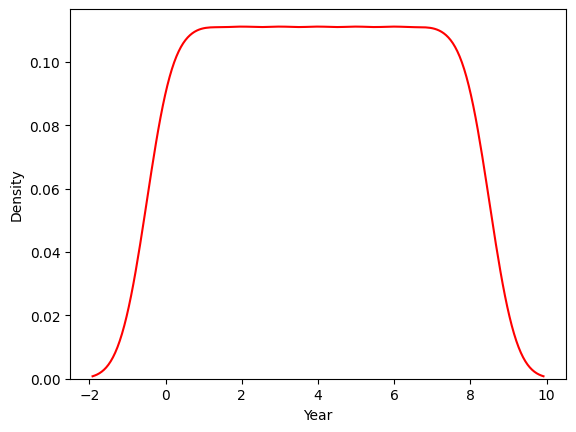

title Rainfall (mm)


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


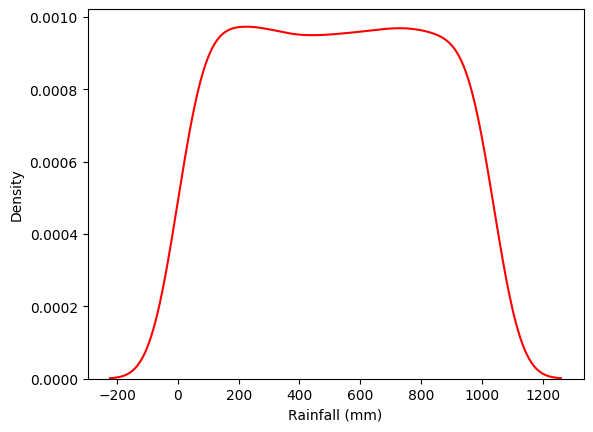

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


title Elevation (m)


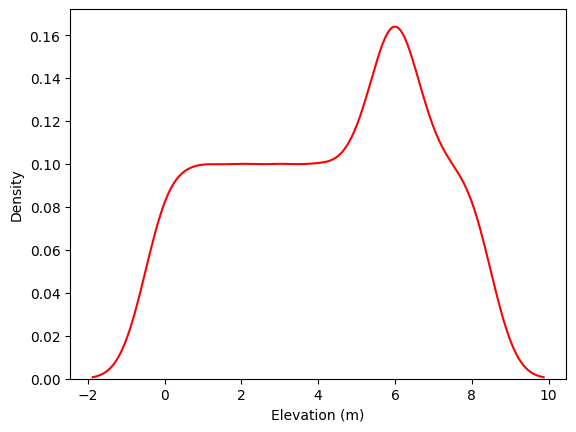

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


title Climate_Type


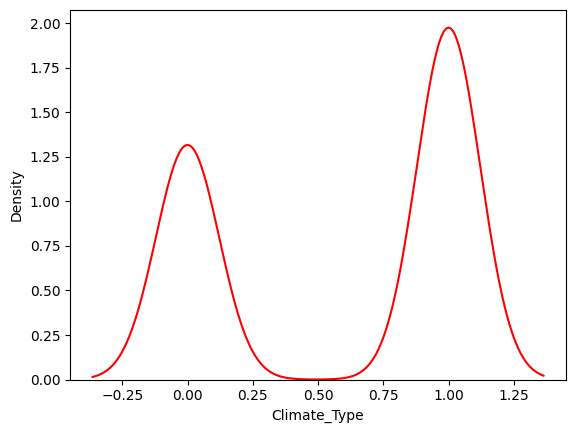

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


title Temperature (°C)


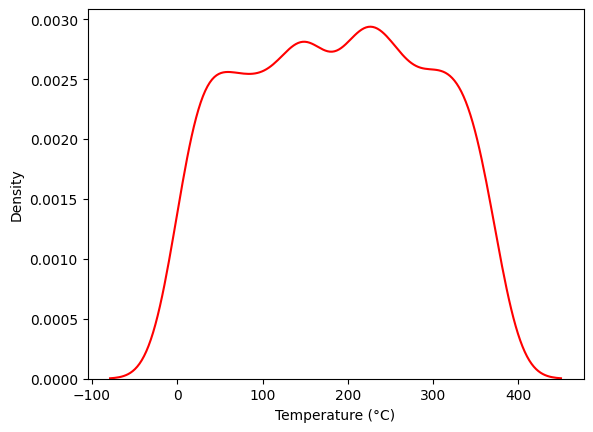

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


title Humidity (%)


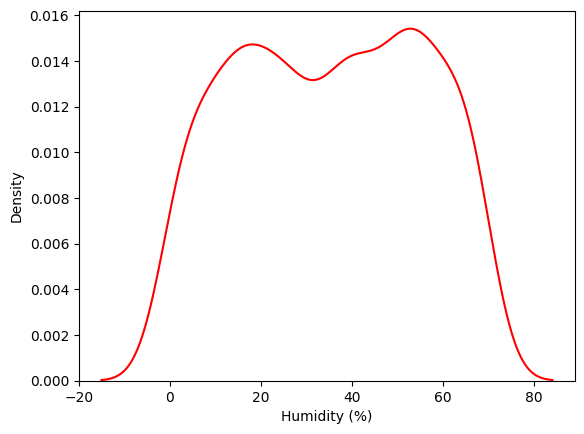

In [32]:
for col in df.columns:
    sns.kdeplot(df[col],color="red")
    print(f"title {col}")
    plt.show()

In [33]:
df.describe()

,City,Latitude,Longitude,Month,Year,Rainfall (mm),Elevation (m),Climate_Type,Temperature (°C),Humidity (%)
count,1080.000000,1080.000000,1080.000000,1080.000000,1080.000000,1080.000000,1080.000000,1080.000000,1080.000000,1080.000000
mean,4.500000,4.500000,4.500000,5.500000,4.000000,517.080556,4.200000,0.600000,185.185185,35.153704
std,2.873612,2.873612,2.873612,3.453652,2.583185,300.465074,2.523072,0.490125,106.249243,20.303775
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,2.000000,2.000000,2.750000,2.000000,255.750000,2.000000,0.000000,94.750000,17.000000
50%,4.500000,4.500000,4.500000,5.500000,4.000000,517.500000,4.500000,1.000000,188.500000,36.000000
75%,7.000000,7.000000,7.000000,8.250000,6.000000,776.250000,6.000000,1.000000,274.000000,53.000000
max,9.000000,9.000000,9.000000,11.000000,8.000000,1037.000000,8.000000,1.000000,371.000000,69.000000


In [36]:
df.corr()

,City,Latitude,Longitude,Month,Year,Rainfall (mm),Elevation (m),Climate_Type,Temperature (°C),Humidity (%)
City,1.000000e+00,-3.696970e-01,-3.030303e-02,9.322629e-17,3.317850e-16,-0.011759,6.488470e-01,-5.685352e-01,0.012670,-0.003256
Latitude,-3.696970e-01,1.000000e+00,2.727273e-01,-1.617360e-16,-1.217580e-16,-0.009231,-7.592891e-01,4.974683e-01,0.026633,0.020364
Longitude,-3.030303e-02,2.727273e-01,1.000000e+00,-2.253107e-16,-2.146844e-16,0.009242,1.656631e-01,-4.974683e-01,0.020110,0.059011
Month,9.322629e-17,-1.617360e-16,-2.253107e-16,1.000000e+00,2.952532e-18,-0.005121,1.404221e-16,-6.613515e-17,0.020503,-0.020592
Year,3.317850e-16,-1.217580e-16,-2.146844e-16,2.952532e-18,1.000000e+00,-0.013427,3.856325e-16,-3.767644e-16,-0.030755,-0.016964
Rainfall (mm),-1.175949e-02,-9.230594e-03,9.242401e-03,-5.120659e-03,-1.342729e-02,1.000000,-6.936560e-04,-2.016496e-02,0.013295,0.014274
Elevation (m),6.488470e-01,-7.592891e-01,1.656631e-01,1.404221e-16,3.856325e-16,-0.000694,1.000000e+00,-8.255930e-01,-0.002527,0.012642
Climate_Type,-5.685352e-01,4.974683e-01,-4.974683e-01,-6.613515e-17,-3.767644e-16,-0.020165,-8.255930e-01,1.000000e+00,-0.007813,-0.034980
Temperature (°C),1.267001e-02,2.663313e-02,2.010993e-02,2.050327e-02,-3.075532e-02,0.013295,-2.527204e-03,-7.812867e-03,1.000000,0.024901
Humidity (%),-3.256323e-03,2.036393e-02,5.901093e-02,-2.059163e-02,-1.696358e-02,0.014274,1.264227e-02,-3.498006e-02,0.024901,1.000000


<Axes: >

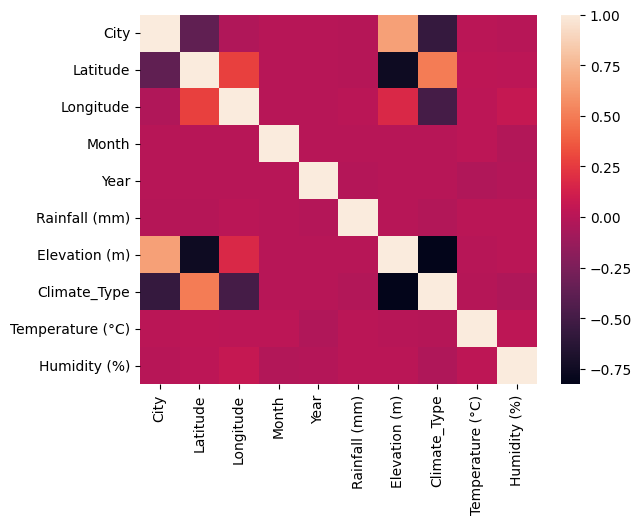

In [38]:
sns.heatmap(df.corr())

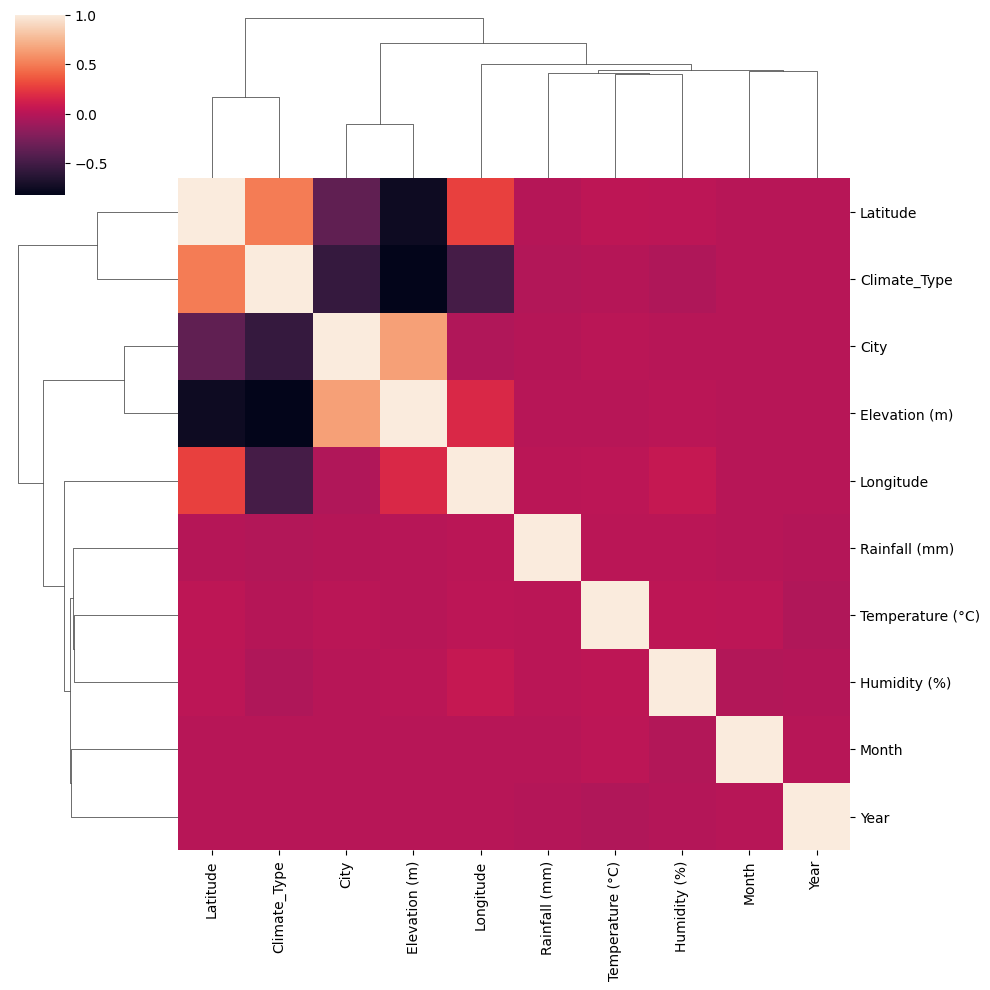

In [39]:
sns.clustermap(df.corr())